<a href="https://colab.research.google.com/github/eduardodpms/CIS_Notebooks/blob/main/Trainee/Per%C3%ADodo%201%20(Classifica%C3%A7%C3%A3o%20e%20Regress%C3%A3o)/Regress%C3%A3o/CIS_Trainee_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Trainee CIS (1° Período) - Regressão***

Informações do aluno:

- **Nome**: Eduardo de Pina Moreira Santos
- **Matrícula**: 231034494
- **Curso**: Engenharia de Software (FCTE)
- **E-mail**: eduardopms19@hotmail.com

## **1. Introdução**

Este trabalho corresponde ao desenvolvimento da primeira atividade do 1° período do processo de *Trainee* do capítulo estudantil do [*Computational Intelligence Society*](https://cis.ieee.org) do *IEEE*, na [Universidade de Brasília](https://www.unb.br). Demais informações do *Trainee* estão disponíveis no [*GitHub*](https://github.com/UnB-CIS/Trainee/tree/main). O foco dessa atividade é a elaboração de um modelo de regressão simples, utilizando bibliotecas renomadas do [*Python*](https://www.python.org), tais como [*Pandas*](https://pandas.pydata.org), [*Matplotlib*](https://matplotlib.org), [*seaborn*](https://seaborn.pydata.org), [*scikit-learn*](https://scikit-learn.org) e [*NumPy*](https://numpy.org). O conjunto de dados de treino é o *Wine Quality*⁽¹⁾, organizado pela [*UCI*](https://archive.ics.uci.edu) e disponível no [*Kaggle*](https://www.kaggle.com).

Esse *dataset* traz atributos do [Vinho Verde português](http://www.vinhoverde.pt/en/) como acidez, densidade, pH, teor e, como *target*, uma nota discreta de 0 a 10 referente à qualidade do vinho. O conjunto é dividido em duas partes, uma para o Vinho Branco, com 4898 amostras, e outra para o Vinho Vermelho, com 1599 amostras. A análise será centrada no Vinho Branco, por este apresentar um número maior de amostras. Para o desenvolvimento da atividade, será feita uma curta análise do *dataset*, seguida da elaboração do modelo de regressão.

## **2. Análise do *Dataset***

### 2.1. Importação e reconhecimento

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd # Manipulação de arquivos
import matplotlib.pyplot as plt # Geração de figuras
import seaborn as sns # Visualização estatística
import numpy as np # Manipulação de arrays

In [ ]:
# Importação e visualização do dataset
data = pd.read_csv(filepath_or_buffer='winequality-white.csv', delimiter=';') # Tranfere-se o conjunto de dados para um Dataframe, com o auxílio da biblioteca Pandas

print(f'{data.to_string(max_rows=10)}') # Apresenta as n primeiras e n últimas linhas da relação

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0               7.0              0.27         0.36            20.7      0.045                 45.0                 170.0  1.00100  3.00       0.45      8.8        6
1               6.3              0.30         0.34             1.6      0.049                 14.0                 132.0  0.99400  3.30       0.49      9.5        6
2               8.1              0.28         0.40             6.9      0.050                 30.0                  97.0  0.99510  3.26       0.44     10.1        6
3               7.2              0.23         0.32             8.5      0.058                 47.0                 186.0  0.99560  3.19       0.40      9.9        6
4               7.2              0.23         0.32             8.5      0.058                 47.0                 186.0  0.99560  3.19       0.40      9.9        6
...       

In [ ]:
data.info() # Distribuição dos elementos no dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


A análise rápida das tuplas da relação, com o uso do método *to_string*, bem como da contagem de elementos nulos, com o uso do método *info*, permite a extração das seguintes informações referentes aos dados:

- A relação é composta por 4898 tuplas e 12 atributos;
- O *dataset* não parece apresentar dados faltantes ou nulos;
- Os atributos são todos numéricos, o que dispensa *encoding*.

### 2.2. Análise das distribuições

Antes de seguir para a análise das correlações, é importante também verificar o histograma de cada atributo, a fim de entender a distribuição de cada um e de investigar a presença de *outliers*, os quais podem impactar a performance do modelo.

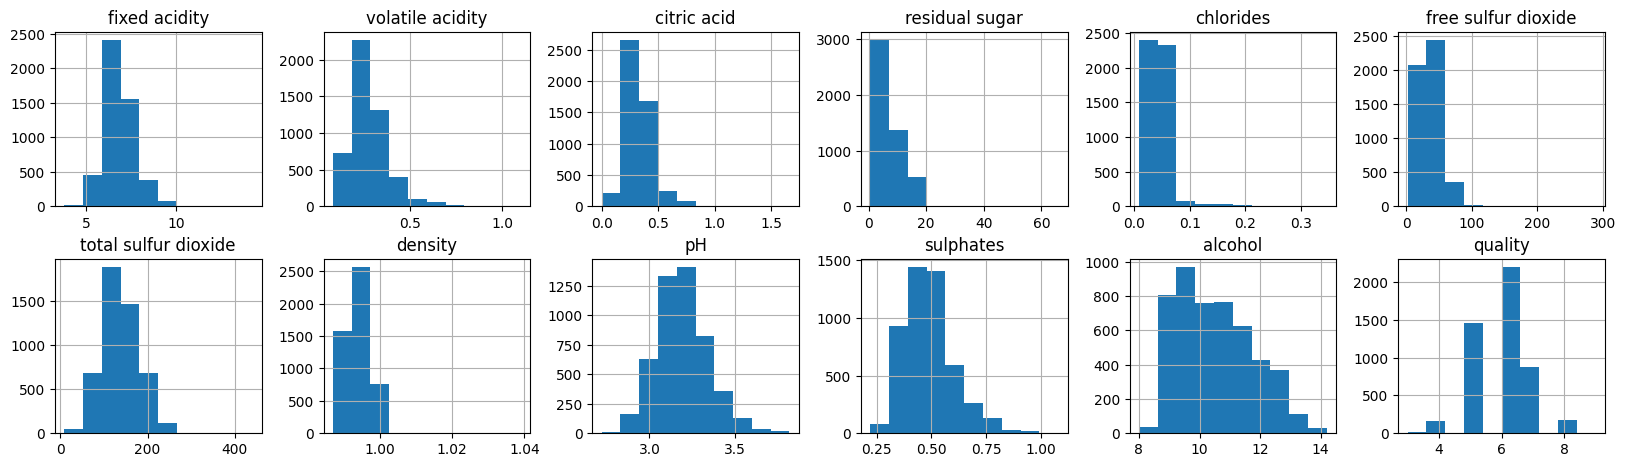

In [ ]:
plot = data.hist(figsize = (20,17), layout=[6,6]) # Criação de um histograma para cada atributo

A visualização dos histogramas revela que a maioria dos atributos possuem uma distribuição normal distorcida, enquanto itens como acidez volátil, acidez fixa, dióxido de enxofre total, pH e sulfatos são aproximadamente normais. Além disso, *outliers*, isto é. valores muito distoantes com relação a média dos valores, não parecem estar presentes em nenhum dos atributos.

### 2.3. Estudo de correlações

A fim de finalizar a etapa de análise do *dataset*, utiliza-se do *heatmap* do *Seaborn* para a visualização das Correlações de Pearson existentes entre cada par de atributos, o que permite uma abordagem das variáveis que efetivamente impactam a qualidade do vinho.

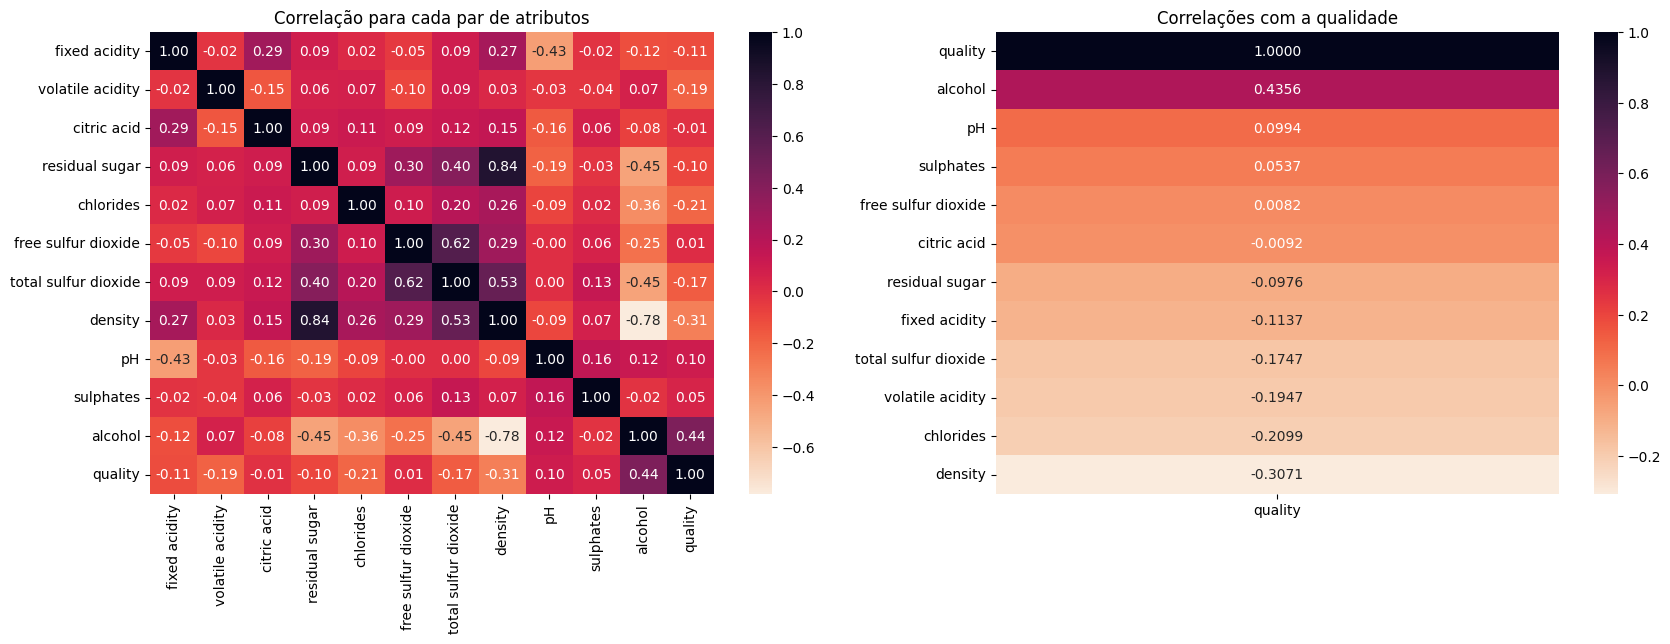

In [ ]:
# Visualização de correlações do dataset

fig, axes = plt.subplots(1, 2, figsize=(20, 6)) # Criação do subplot

# Heatmap para correlações gerais
sns.heatmap(data.corr(), annot=True, cmap='rocket_r', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlação para cada par de atributos')

# Heatmap para correlações com "quality"
sns.heatmap(data.corr()[['quality']].sort_values(by='quality', ascending=False),
            annot=True, cmap='rocket_r', fmt=".4f", ax=axes[1])
axes[1].set_title('Correlações com a qualidade')

plt.show() # Visualização do subplot

Uma análise rápida do *heatmap* da correlação existente em cada dupla de atributos permite concluir que o elemento que mais parece impactar na qualidade do vinho é o teor alcoólico, enquanto itens como densidade e acidez volátil apresentam uma alta relação inversa.

Após uma análise direta e concisa do *dataset*, prossegue-se para a elaboração do modelo em si.

## **3. Elaboração do Modelo (*Random Forest*)**

O modelo de regressão selecionado para essa atividade é o Random Forest Regressor⁽²⁾, o qual é um tipo específico de modelo de Árvore de Decisão, em que há uma pluralidade de árvores treinadas com diferentes subconjuntos de dados. Tipicamente, modelos de árvore são preferíveis em algumas situações, por exemplo, por não necessitarem de escalonação dos dados, por lidarem bem com variáveis correlacionadas, e por necessitarem de menos parametrizações. A Random Forest, além disso, é mais robusta e tende a reduzir o *overfitting*.

### 3.1. Definição de Parâmetros e Hiperparâmetros

In [ ]:
# Parâmetros Gerais
test_size = 0.2 # Proporção de dados de teste em relação ao tamanho do dataset
random_state = 42 # Dita como o modelo aleatorizará os dados de treino

In [ ]:
# Hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300, 500], # Número de árvores
    'max_depth': [None, 10, 20, 30], # Profundidade máxima de cada árvore
    'min_samples_leaf': [1, 2, 4, 8] # Número mínimo de amostras por folha
}

A definição de hiperparâmetros permitirá, durante a etapa de treinamento, que o *GridSearch*⁽³⁾ faça uma Validação Cruzada com os parâmetros *n_estimators*, *max_depth* e *min_samples_leaf*, para determinar o conjunto de parâmetros que minimize o erro médio quadrático.

### 3.2. Preparação para o treinamento

In [ ]:
# Importação de bibliotecas relacionadas ao modelo RandomForest
from sklearn.ensemble import RandomForestRegressor # Regressor (RandomForest)
from sklearn.model_selection import train_test_split, GridSearchCV # Classes de split e otimização
from sklearn.metrics import mean_squared_error, r2_score # Métricas de avaliação

In [ ]:
# Separando features e target
x = data.drop('quality', axis=1)
y = data['quality']

# Separando conjuntos de teste e treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

In [ ]:
# Criação do modelo de regressão
rf = RandomForestRegressor(random_state=random_state)

### 3.3. *GridSearch* e treinamento

O *GridSearch*⁽³⁾ é uma ferramenta que permite a execução de uma Validação Cruzada no conjunto de parâmetros definido em *3.1. Definição de Parâmetros e Hiperparâmetros* de forma simplificada. Aqui, será utilizado para definir o melhor valor, dentre aqueles fornecidos, para cada um dos parâmetros, sendo eles *n_estimators*, *max_depth* e *min_samples_leaf*.

In [ ]:
# Aplicação do GridSearch com validação cruzada
grid = GridSearchCV(rf, param_grid, scoring='neg_root_mean_squared_error') # Prepara o GridSearch
grid.fit(x_train, y_train) # Executa o GridSearch no conjunto de treino

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Visualização dos atributos ótimos da GridSearch
print('Atributos Ótimos:\n') # Título
print(f'Hiperparâmetros: {grid.best_params_}') # Melhores hiperparâmetros encontrados
print(f'Score da Validação Cruzada: {grid.best_score_:.4f}') # Melhor score da validação cruzada

Atributos Ótimos:

Hiperparâmetros: {'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 500}
Score da Validação Cruzada: -0.6290


### 3.4. Predição e avaliação do modelo

Ainda com o auxílio do *GridSearch*⁽³⁾, separa-se o modelo já treinado com os valores ótimos na variável "*best*", a fim de avaliar a sua predição com as métricas "RMSE" (Erro Quadrático Médio da Raiz) e "R²" (Coeficiente de Determinação).

In [ ]:
# Otimização e predição do modelo
best = grid.best_estimator_ # Modelo com os parâmetros ótimos
preds = best.predict(x_test) # Predição do modelo com os parâmetros ótimos

In [ ]:
# Geração das métricas de avaliação
rmse = mean_squared_error(y_test, preds) # Erro médio quadrático
r2 = r2_score(y_test, preds) # R Quadrado (R-Squared)

# Visualização das métricas de avaliação
print(f'RMSE: {rmse:.4f}\nR²: {r2:.4f}')

RMSE: 0.3435
R²: 0.5564


### 3.5. Teste personalizado

Aqui, é possível testar a predição do modelo Random Forest, com os parâmetros definidos, para um conjunto de atributos personalizado.

In [ ]:
# "Criação" de um vinho personalizado
custom_input = pd.DataFrame([[
    6.2, # fixed acidity
    0.21, # volatile acidity
    0.29, # citric acid
    1.6, # residual sugar
    0.039, # chlorides
    40.0, # free sulfur dioxide
    100.0, # total sulfur dioxide
    0.994, # density
    3.3, # pH
    0.45, # sulphates
    10.0 # alcohol
]], columns=x.columns)

In [ ]:
# Teste do modelo para o vinho personalizado
predicted_quality = best.predict(custom_input) # Predição do caso personalizado
print(f'Qualidade prevista: {predicted_quality[0]:.0f}') # Visualização da predição

Qualidade prevista: 6


## **4. Conclusão**

Após uma análise rápida do conjunto de dados referentes à qualidade de 4898 amostras do Vinho Branco, no contexto fornecido, e treinamento de um modelo de regressão baseado na árvore de decisão Random Forest utilizando Validação Cruzada, com parâmetros ótimos expostos em *3.3. GridSearch e treinamento*, foi obtido um modelo de desempenho médio aceitável, com erro médio quadrático de aproximadamente 34% e coeficiente de determinação de aproximadamente 56%.

## **5. Referências**

- 1. **Wine Quality**. Kaggle. Disponível em: https://www.kaggle.com/datasets/arnavs19/wine-quality-uci-machine-learning-repository. Acesso em: 11 maio 2025.
- 2. BEHESHTI, N. **Random Forest Regression**. towards data science. Disponível em: https://towardsdatascience.com/random-forest-regression-5f605132d19d/. Acesso em: 11 maio 2025.
- 3. OKAMURA, S. **GridSearchCV for Beginners**. towards data science. Disponível em: https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee/. Acesso em: 11 maio 2025.